In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression, mutual_info_regression

In [2]:
# Carga de datos.
np.random.seed(42)
X = np.random.rand(1000, 3)
print(X)
print(np.shape(X))

[[0.37454012 0.95071431 0.73199394]
 [0.59865848 0.15601864 0.15599452]
 [0.05808361 0.86617615 0.60111501]
 ...
 [0.80000348 0.55270708 0.39655368]
 [0.13171503 0.86529576 0.15727321]
 [0.30978786 0.29004553 0.87141403]]
(1000, 3)


In [3]:
# Definimos la etiqueta (target, ground truth) haciéndola dependiente de las características x1 y x2
y = X[:, 0] + np.sin(6 * np.pi * X[:, 1]) + 0.1 * np.random.randn(1000)
print(y)

[-3.20495993e-01  8.59724761e-01 -4.53839437e-01  9.49822783e-01
  1.95204144e-01 -3.11753818e-01 -3.17897000e-01 -5.46874608e-01
  1.06656424e+00 -4.30285193e-01  4.31960402e-01  2.10168273e-01
  1.11607412e+00  1.29688228e+00 -1.01896563e+00  4.19515554e-01
  1.56974742e-01 -3.04410979e-01 -5.08938605e-01  1.07250146e+00
 -5.47028524e-01 -5.32834187e-01  7.10713830e-01  1.95043772e+00
  4.47803691e-01  1.79455296e+00  1.14025117e+00  4.44804995e-01
  1.16615263e-01 -1.86212997e-01  7.92666628e-01  1.38847321e+00
  1.53617734e+00  6.61401598e-01  1.56783790e-01  1.16643619e+00
  1.19859553e+00 -9.01186764e-01  6.40304832e-02 -6.08421282e-01
 -3.02908053e-01 -8.97647236e-01  1.74586460e-01  1.44564648e+00
  1.92144717e-01 -1.68596920e-01 -2.35724012e-01  2.03227752e-01
  9.46185033e-01  1.33469788e+00 -1.44614217e-01  2.39938357e-01
  1.59357739e+00  1.30573035e+00  1.76495421e-01  7.34927013e-01
 -1.07904770e+00 -1.26418769e-01  5.81684355e-01 -6.57427415e-01
  1.26585318e+00  4.23161

In [4]:
# Evaluación de atributos: F-Test.
f_test, _ = f_regression(X, y) # Llamamos al estadístico F
f_test /= np.max(f_test) # Normalizamos

In [5]:
# Evaluación de atributos: información mutua.
mi = mutual_info_regression(X, y)
mi /= np.max(mi)

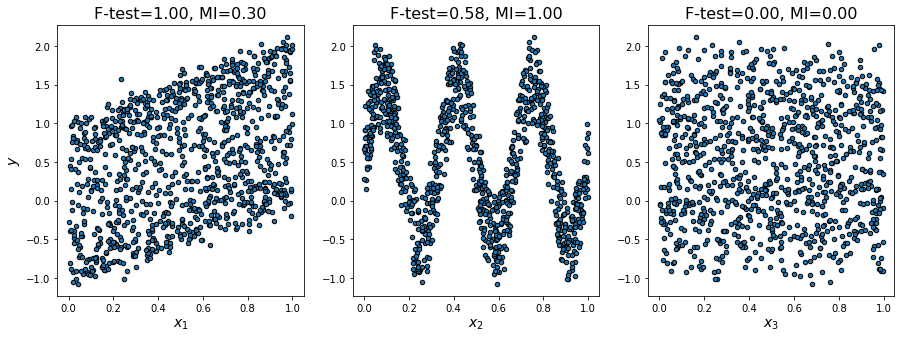

In [6]:
# Graficamos la distribución de los datos y evaluación de atributos.
plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.scatter(X[:, i], y, edgecolor='black', s=20)
    plt.xlabel("$x_{}$".format(i + 1), fontsize=14)
    if i == 0:
        plt.ylabel("$y$", fontsize=14)
    plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[i],
              mi[i]), fontsize=16)
plt.show()